Examples of Real Network Analysis 
=========================================

1. Mail Analysis
2. Citation Network Analysis
3. Twitter Network Analysis
4. Facebook Network Analysis

1. Mail Analysis
==================

You can find an interessting example here [Immersion: a people-centric view of your email life](https://immersion.media.mit.edu).
    

2. Citation Network Analysis
===============================

Some research for the [Canadian Legal Information Institute](https://www.canlii.org/en/) to help them decide how to expand the coverage of their databases of Canadian court decisions has been developed and presented in a [Notebook](http://nbviewer.ipython.org/github/twneale/citation-network-analysis/blob/master/Citation%20Network%20Analysis.ipynb). 

Some source of this notebook and the sample data it requires are on [github page](https://github.com/twneale/citation-network-analysis). To install locally, do the following:

    $ virtualenv pydata2013
    $ source ./pydata2013/bin/activate
    $ git clone git@github.com:twneale/citation-network-analysis.git
    $ cd citation-network-analysis
    # Note: if the follwing step fails, you're missing dependencies. If resolving them is not you're cup of tea,
    # I recommend installing the free anaconda distribution of python from Continuum Analytics: https://store.continuum.io/
    $ pip install -r requirements.txt


Citation data
-------------------------

Let's load a graph containing about 6000 citations between Supreme Court of Canada (SCC) cases from the years 2000 through 2013, using JSON format. 

In [10]:
%matplotlib inline 
import networkx as nx
import numpy as np

In [11]:
# Networks can be serialized to, and loaded from, JSON and a number of other formats.
# Here we're loading a graph
import json
from pprint import pprint
import matplotlib.pyplot as plt

json_data=open('files/scc.json')

data = json.load(json_data)
pprint(data)

# It is necessary to close the json file
json_data.close()


{u'directed': True,
 u'graph': [],
 u'links': [{u'source': 29, u'target': 3996, u'year': 2000},
            {u'source': 30, u'target': 3857, u'year': 2000},
            {u'source': 30, u'target': 1019, u'year': 2000},
            {u'source': 30, u'target': 1020, u'year': 2000},
            {u'source': 30, u'target': 1021, u'year': 2000},
            {u'source': 30, u'target': 1719, u'year': 2000},
            {u'source': 30, u'target': 803, u'year': 2000},
            {u'source': 30, u'target': 805, u'year': 2000},
            {u'source': 30, u'target': 806, u'year': 2000},
            {u'source': 30, u'target': 809, u'year': 2000},
            {u'source': 30, u'target': 810, u'year': 2000},
            {u'source': 30, u'target': 921, u'year': 2000},
            {u'source': 31, u'target': 3811, u'year': 2000},
            {u'source': 32, u'target': 3812, u'year': 2000},
            {u'source': 33, u'target': 1850, u'year': 2000},
            {u'source': 33, u'target': 35, u'year': 2000

In [ ]:
# Build a graph from the data
import json
from networkx.readwrite import json_graph

G = json_graph.node_link_graph(data)

pos=nx.spring_layout(G)   # G is my graph, pos determines the position of nodes.

# Draw simpler graph:
nx.draw(G)


In [ ]:
G?

In [ ]:
from itertools import islice

# Now we can look at some basic characteristics of the network.
print 'Number of nodes:', G.number_of_nodes()
print 'Number of edges:', G.number_of_edges()
 
# Let's view some of the nodes.
print 'Here are a few nodes'
for node in islice(G.nodes_iter(), 5):
    print ' -', node
    
# Let's view some of the edges. Note that they're just 2-tuples of nodes.
print 'Here are a few edges'
for edge in islice(G.edges_iter(), 5):
    print ' -', edge

Citation system usually contains the following information:
- Year of decision
- Abbreviated title of the court
- Decision number (not the court file number)

Let's use the **degree centrality** of the graph.

In [ ]:
# Trim the graph
def trim_degrees(graph, degree=1):
    g = graph.copy()
    d = nx.degree(g)
    for n in g.nodes():
        if d[n] <= degree:
            g.remove_node(n)
    return g


print 'Number of nodes:', trim_degrees(G).number_of_nodes()
# If we remove from the graph nodes with degree centrality less or equal than 1?
# From Number of nodes: 4789 to:

Many of the citations are not referenced by other citations!

In [ ]:
# What happen if we consider only the graph nodes with more than 25 degree centrality?
len(trim_degrees(G, degree=5))


In [ ]:
# Plot this new smaller graph
pos=nx.circular_layout(G)

nx.draw(trim_degrees(G, degree=25), pos)

## Exploring the data

If we want to explore the whole original network, let's make whatever observations we can about this example graph of case citations. As we saw above, simply printing a few nodes and edges is profoundly useless and tells us nothing about the data. Network data is challenging in that, even for small networks, there's really no easy way to understand the data without plotting it's characteristics and looking at some charts.


### Plot Histograms 

Histograms might be helpful for the data. What vizualizations we need will depend on the data, but for purposes of basic exploration, we will probably want to look at some histograms.

In [ ]:
# This histogram below shows the distribution of citing cases by publication years. 
# So we retrieved the publication year of the citing case for each network edge, 
# then plotted the distribution of those values.
from matplotlib import pyplot as plt
import numpy

years = tuple(G.get_edge_data(*edge)['year'] for edge in G.edges_iter())
plt.hist(years, 14)
plt.xlabel('Years')
plt.ylabel('Number of Cases')
plt.show()

In [ ]:
G.get_edge_data?

### Degree Distribution of the Network

If the network is scale-free, we may be able to apply network analysis techniques that are known to work well on other scale-free networks, like the Internet. 


In [ ]:
# Compute the degree histogram
degrees = G.degree().values()
h, bins= numpy.histogram(degrees, bins=100)
x_series = bins.compress(h)
y_series = h.compress(h)
plt.plot(x_series, y_series)
plt.xlabel('Number of cases with y inbound citations')
plt.ylabel('Number of inbound citations')
plt.show()
 

### Page Rank

Apply Page Rank to find the highest ranked source and print the sources that cite it:

In [ ]:
from operator import itemgetter
 
# Calculating PageRank values for our graph
ranks = nx.pagerank(G)

# Let's retrieve the highest ranked case.
highest = sorted(ranks, key=ranks.get).pop()
first = itemgetter(0)
print 'The highest ranked case was %s (%r)' % (highest, ranks[highest])
print 'It was cited by these cases:'
print sorted(map(first, G.in_edges(highest)))


3. Twitter Network Analysis
===============================


<div class = "alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
**Exercise**: 

</li>
<ol>
<ul>
</ul>
<li> Select a Twitter user and access to his/her followers doing scraping. Choose the user to have a reasonable number of nodes (a scientific, a football player,...). Stop at the second level of followers: access to main user followers and her/his followers F, add to the graph only the edges between the followers which are in F.</li>

<li> Save the information using pickle for avoiding to repeat the scraping with the Twitter API.</li>
<li> Build the graph.</li>
<li> Use Page Rank to know who is the most connected person (highest ranked contact).</li>
<li> Make a pruning of the graph by removing leaf nodes with degree less than a value passed to the parameter.</li>
<li> Indicate which parameter setting is necessary to have a graph with less than 50 nodes.</li>
<li> Look for a Hub node using centrality. </li>
<li> Indicate the 10 users with:
<ul>
    <li> higher degree of centrality on the pruned graph</li>
    <li> higher interrelation degree on the pruned graph</li>
    <li> higher degree closeness centrality on the pruned graph</li>
    <li> higher degree eigenvector centrality on the pruned graph</li>
</ul>
<li>  Find the maximal clique on the network and on the pruned network. Extract conclusions.</li>

</ol>
</div>


In [ ]:
# Your solution here

4. Facebook Network Analysis
===============================


<div class = "alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
**Exercise**: 

</li>
<ol>
<ul>
</ul>
<li> We consider *Social circles: Facebook* [EGO_FACEBOOK](https://snap.stanford.edu/data/egonets-Facebook.html).
This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.
Facebook data has been anonymized by replacing the Facebook-internal ids for each user with a new value. Also, while feature vectors from this dataset have been provided, the interpretation of those features has been obscured. For instance, where the original dataset may have contained a feature "political=Democratic Party", the new data would simply contain "political=anonymized feature 1". Thus, using the anonymized data it is possible to determine whether two users have the same political affiliations, but not what their individual political affiliations represent.</li>

<li> Load the Facebook network into NetworkX!
The ego-facebook dataset is defined by an edge list, so the file is a plain text file with one edge per line. The file is uncompressed and ready in `files/facebook_combined.txt`
The network consists of an undirected and unweighted network that contains friendships between users of Facebook.</li>
<li> Repeat the network analysis done with the Hamster network with this network.</li>

<li> The Facebook network is divided into a set of 10 ego-networks which are interconnected to form the fully connected graph.
The dataset includes the information of these 10 manually defined ego-networks. In particular, we have available the list of the 10 ego nodes: '0', '107', '348', '414', '686', '1684', '1912', '3437', '3980' and their connections.
Extract the ego-networks of the node '107' with a distance of 1 and 2, and compute their sizes.</li>


<li> Answer the following questions:
<ul>
    <li> Which is the most densely connected egonetwork?</li>
    <li> Which is the largest (# nodes) egonetwork? </li>
    <li> Is there intersection between ego-networks in the Facebook network?</li>
</ul>
</ol>
</div>


In [2]:
# Load the facebook network:
facebook = nx.read_edgelist("files/facebook_combined.txt")

In [3]:
# Your solution here


In [12]:
# For point 4 use:
import os.path

egoid = '107'
G_107 = nx.read_edgelist(os.path.join('files/facebook','{0}.edges'.format(egoid)),nodetype=int)    
print 'Nodes of the ego graph 107: ', len(G_107)

Nodes of the ego graph 107:  1034


In [13]:
fb_nodes, fb_edges = facebook.order(), facebook.size()
fb_avg_deg = fb_edges/fb_nodes

print 'Number of noeds: ' , fb_nodes
print 'Edges: ', fb_edges
print 'Average degree: ', fb_avg_deg

Number of noeds:  4039
Edges:  88234
Average degree:  21


Let's plot the degree distribution

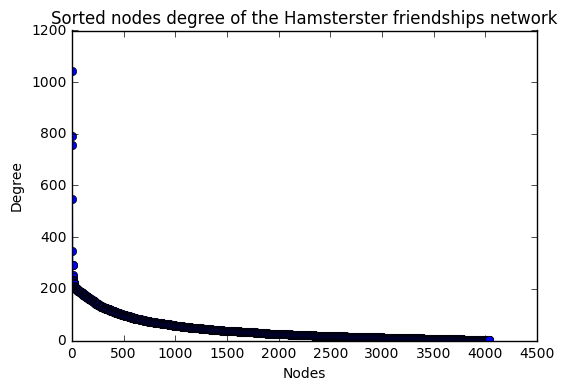

In [22]:
degree_sequence = sorted(facebook.degree().values(), reverse= True)
plt.plot(degree_sequence, 'b-', marker='o')
plt.xlabel('Nodes')
plt.ylabel('Degree')
plt.title('Sorted nodes degree of the Hamsterster friendships network')

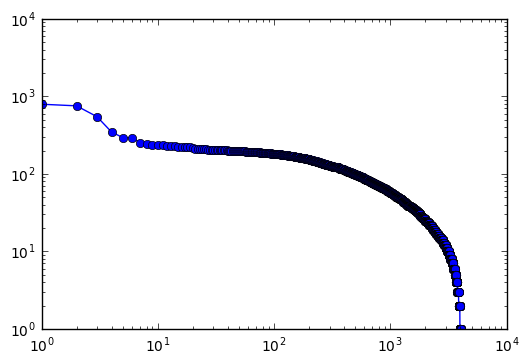

In [23]:
plt.loglog(degree_sequence, 'b-', marker='o')

Histograma de numero de nodos de degree determinado.


150
151


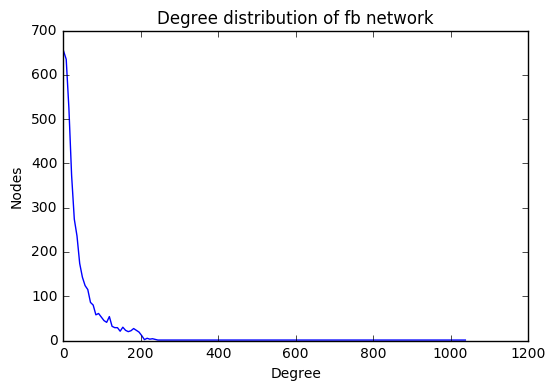

In [34]:
import numpy as np
degree = facebook.degree().values()
hist, bins =np.histogram(degree, bins=150)
x_series =bins.compress(hist)
y_series = hist.compress(hist)
plt.plot(x_series, y_series)
plt.xlabel('Degree')
plt.ylabel('Nodes')
plt.title('Degree distribution of fb network')
plt.show()

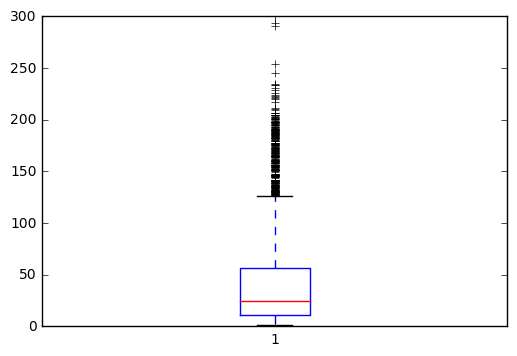

the mean is:  43.6910126269 and the std  52.4141155674


In [31]:
#boxplot
plt.boxplot(degree)
plt.ylim(ymax=300)
plt.show()
print 'the mean is: ',np.mean(degree), 'and the std ', np.std(degree)

In [70]:
a= range(10)
a[-5:]

[5, 6, 7, 8, 9]

This is a scale-free network, its degree distribution follows a power law, at least assimptoticly. The fraction $P(k)$ of nodes with degree $k$ goes for large values of $k$ as:

$P(k) \sim k^{-\gamma} $, where typically $2 < \gamma <3$. Let's see if we can find $\gamma$ for our network.

In [58]:
print y_series[:-12]
print x_series[:-12] 

[654 635 524 373 274 236 174 143 124 115  86  80  58  61  53  45  41  54
  32  29  29  21  30  23  20  22  27  23  19  11   2]
[   1.      7.96   14.92   21.88   28.84   35.8    42.76   49.72   56.68
   63.64   70.6    77.56   84.52   91.48   98.44  105.4   112.36  119.32
  126.28  133.24  140.2   147.16  154.12  161.08  168.04  175.    181.96
  188.92  195.88  202.84  209.8 ]


gamma =  0.0155829890214 m=  0.0852889249115 m should be close to 0 R =  -0.95044016114
Large K (last 5) gamma =  0.0429476122639 m=  0.230662191378 m should be close to 0 R =  -0.977137718285


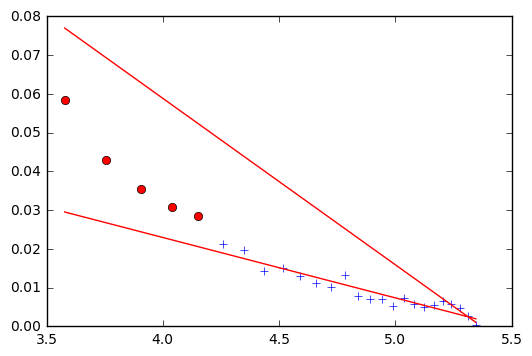

In [72]:
from scipy import stats 

pk = y_series[:-12]/float(len(degree))
logk = np.log(x_series[:-12])
plt.plot(logk[10:] ,pk[10:], 'b+')
plt.plot(logk[5:10], pk[5:10], 'ro')

slope, intercept, r_value, p_value, stderr =stats.linregress(logk[10:],pk[10:])


slope_large, intercept_large, r_value_large, p_value_large, stderr_large =stats.linregress(logk[-5:],pk[-5:])
print 'gamma = ', -slope, 'm= ' ,intercept, 'm should be close to 0' , 'R = ', r_value
print 'Large K (last 5) gamma = ', -slope_large, 'm= ' ,intercept_large, 'm should be close to 0' , 'R = ', r_value_large
plt.plot(logk[5:], logk[5:]*slope_large + intercept_large, 'r')
plt.plot(logk[5:], logk[5:]*slope + intercept, 'r')

In both cases $\gamma$ is out of bounds 2, 3. Voluntary survey participants are a poor representation of the real network. that is why we have so many nodes with degree 1 < d < 8. That makes up 25% of the nodes in the data set, and probably the ones that participated, that is, that shared their egonetwork are the ones we are treating as high k. It makes no sense to measure gamma in this case, we would need to look for k > 1000 in a real world example. Nonetheless it is surprisingly accurate how they can be represented by a power law.

In [ ]:
print 'Number of connected components: ', nx.number_of_connected_components(facebok)

In [87]:
#Lets extract the most popular node


d = facebook.degree()
d_as_list_of_tuples = d.items() ## gives a list of touples (key , value)
d_sorted = sorted(d.items(), key=lambda x: x[1], reverse = True)
it_girl = d_sorted[0]


(u'107', 1045)

In [91]:
#Now we extract its ego network

ego_it_girl_1= nx.ego_graph(facebook, it_girl[0], radius=1)
ego_it_girl_2 = nx.ego_graph(facebook, it_girl[0], radius=2)

In [92]:
print 'Number of nodes at dist 2: ', nx.number_of_nodes(ego_it_girl_2)
print 'Number of cliques: ', nx.number_of_cliques(ego_it_girl_1)



Number of nodes at dist 2:  2687
Number of cliques:  {u'1200': 2, u'1383': 1, u'1269': 28405, u'1160': 12424, u'1268': 7, u'1296': 35, u'1802': 3, u'1524': 125, u'1257': 1407, u'1526': 23, u'0': 1, u'1527': 9, u'1520': 30208, u'348': 16, u'1261': 911, u'1253': 1, u'1799': 309045, u'1798': 43, u'1399': 1015983, u'1793': 250436, u'1792': 4, u'1791': 55647, u'1790': 46, u'1797': 3, u'1796': 2295, u'1795': 9066, u'1794': 105, u'1490': 2, u'1491': 139171, u'1492': 4, u'1493': 18, u'1494': 48, u'1495': 701, u'1496': 192, u'1497': 28, u'1498': 3, u'1499': 4, u'1395': 1, u'961': 9, u'1700': 16, u'1068': 581, u'1702': 93, u'1703': 445, u'1704': 42, u'1705': 69, u'1706': 237, u'1707': 740813, u'1708': 5, u'1060': 494, u'1063': 45, u'1062': 19, u'1065': 1, u'1064': 50, u'1067': 4720, u'1066': 630, u'913': 64, u'1669': 76894, u'1668': 494341, u'1667': 30, u'1666': 14, u'1665': 354999, u'1664': 2, u'1663': 1245046, u'1662': 283862, u'1661': 1164, u'1660': 15, u'1128': 9949, u'1129': 1803, u'1085': 

In [ ]:
print 'Clustering coef: ', nx.average_clustering(ego_it_girl_1)

In [ ]:
# For questions in point 5 use

import numpy as 

# Fill the 'egosizes' vector with the size (number of edges) of the 10 egonetworks in egoids:
egoids=(0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980)
egosizes=np.zeros((10,1))
i=0
for id in egoids :
    G = nx.read_edgelist(os.path.join('files/facebook','{0}.edges'.format(id)),nodetype=int)    
    egosizes[i]= G.size()      
    print 'size of the egonetwork ', id,  egosizes[i] 
    i +=1

In [ ]:
# Notebook Visualization 
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()